                    EDA                 

Importamos librerias a usar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")

Cargamos el dataset y realizamos una revision del dataframe

In [10]:
df = pd.read_csv('data_final.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52707 entries, 0 to 52706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      52707 non-null  object 
 1   price                      52707 non-null  object 
 2   id                         52707 non-null  int64  
 3   developer                  52707 non-null  object 
 4   Action                     52707 non-null  int64  
 5   Adventure                  52707 non-null  int64  
 6   Animation &amp; Modeling   52707 non-null  int64  
 7   Audio Production           52707 non-null  int64  
 8   Casual                     52707 non-null  int64  
 9   Design &amp; Illustration  52707 non-null  int64  
 10  Early Access               52707 non-null  int64  
 11  Education                  52707 non-null  int64  
 12  Free to Play               52707 non-null  int64  
 13  Indie                      52707 non-null  int

In [11]:
#Primer vistazo general a la data
df.head(3)

,title,price,id,developer,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,...,Web Publishing,year,user_id,items_count,steam_id,playtime_forever,item_id,recommend,review,sentiment_analysis
0,Half-Life,9.99,70,Valve,1,0,0,0,0,0,...,0,1998,kube134,476,76561198031442694,4,251990.0,True,It's good to be a magical queen... if you surv...,2
1,Half-Life,9.99,70,Valve,1,0,0,0,0,0,...,0,1998,76561198030567998,75,76561198030567998,21,332800.0,True,10/10 would take kids here for birthday,1
2,Half-Life,9.99,70,Valve,1,0,0,0,0,0,...,0,1998,76561198030567998,75,76561198030567998,21,319630.0,True,"Well for starters, when I write reviews they a...",2


Para realizar un correcto mapeo de calor quitaremos las variables categoricas del dataframe

In [14]:
# Creamos una lista con solo las variables numéricas
df_num= df.select_dtypes(include = (int,float))


In [15]:
# Eliminamos variables categoricas
df_num.drop(columns=['Action', 'Adventure',
       'Audio Production', 'Casual', 'Design &amp; Illustration',
       'Early Access', 'Education', 'Free to Play', 'Indie', 'Animation &amp; Modeling',
       'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
       'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Web Publishing'], inplace=True)

In [16]:
#Creamos un describe para un analisis rápido de los variables numericas y que columnas tendremos en cuenta
df_num.describe()

,id,year,items_count,steam_id,playtime_forever,item_id,sentiment_analysis
count,52707.000000,52707.000000,52707.000000,5.270700e+04,52707.000000,52682.000000,52707.000000
mean,5963.007418,2004.799628,146.406132,7.656120e+16,4638.936289,170817.665066,1.467054
std,25881.730852,2.953082,233.530828,3.839649e+07,13890.877307,132090.477195,0.758583
min,10.000000,1990.000000,1.000000,7.656120e+16,0.000000,10.000000,0.000000
25%,220.000000,2004.000000,55.000000,7.656120e+16,82.000000,9480.000000,1.000000
50%,320.000000,2005.000000,95.000000,7.656120e+16,559.000000,218230.000000,2.000000
75%,4000.000000,2006.000000,167.000000,7.656120e+16,2751.000000,263020.000000,2.000000
max,339610.000000,2017.000000,7762.000000,7.656120e+16,356217.000000,527340.000000,2.000000


Mapa de correlacion

In [19]:
df_num.head(3)

,id,year,items_count,steam_id,playtime_forever,item_id,sentiment_analysis
0,70,1998,476,76561198031442694,4,251990.0,2
1,70,1998,75,76561198030567998,21,332800.0,1
2,70,1998,75,76561198030567998,21,319630.0,2


<Axes: >

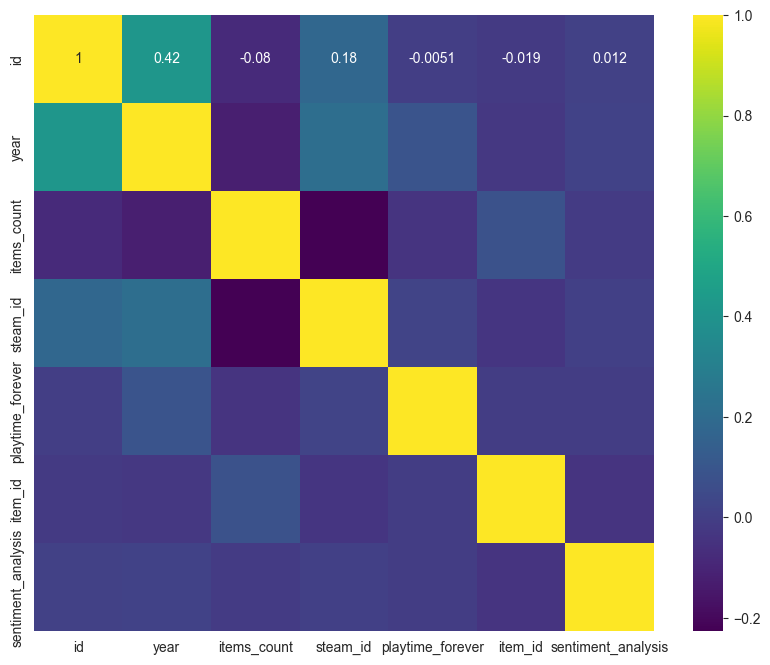

In [17]:
#Creamos una matriz de correlación
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

                Géneros Más Jugados por Horas Jugadas               

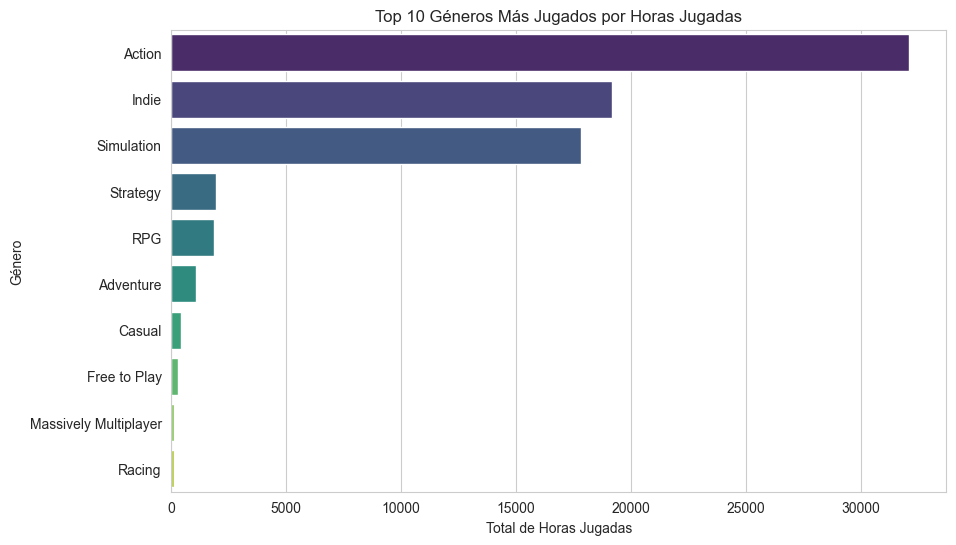

In [60]:
# Calcular el total de horas jugadas por cada género
total_playtime_by_genre = df[genres].sum()

# Ordenar los géneros por el total de horas jugadas
total_playtime_by_genre_sorted = total_playtime_by_genre.sort_values(ascending=False)

# Tomar los 10 géneros más jugados
top_10_played_genres = total_playtime_by_genre_sorted.head(10)

# Crear un gráfico de barras para visualizar el conteo de horas jugadas por los 10 primeros géneros
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_played_genres.values, y=top_10_played_genres.index, palette='viridis')
plt.xlabel('Total de Horas Jugadas')
plt.ylabel('Género')
plt.title('Top 10 Géneros Más Jugados por Horas Jugadas')
plt.show()

                    Juegos con más horas jugadas                    

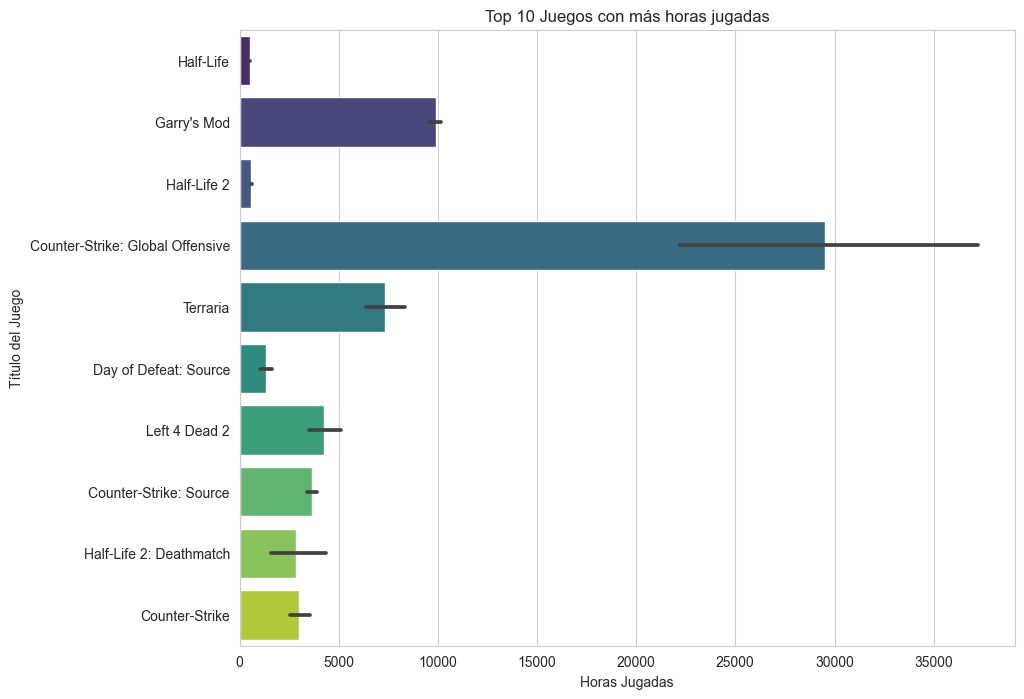

In [66]:
# Encontrar los 10 juegos con más horas jugadas
top_10_juegos_mas_jugados = df.groupby('title')['playtime_forever'].sum().nlargest(10)

# Filtrar el DataFrame para incluir solo los 10 juegos más jugados
df_top_10_juegos_mas_jugados = df[df['title'].isin(top_10_juegos_mas_jugados.index)]

# Crear un gráfico de barras para visualizar las horas jugadas por juego
plt.figure(figsize=(10, 8))
sns.barplot(x='playtime_forever', y='title', data=df_top_10_juegos_mas_jugados, palette='viridis')

# Título y etiquetas de los ejes
plt.title('Top 10 Juegos con más horas jugadas')
plt.xlabel('Horas Jugadas')
plt.ylabel('Título del Juego')

plt.show()

                Desarrolladores con Mayor Grado de Aceptación               

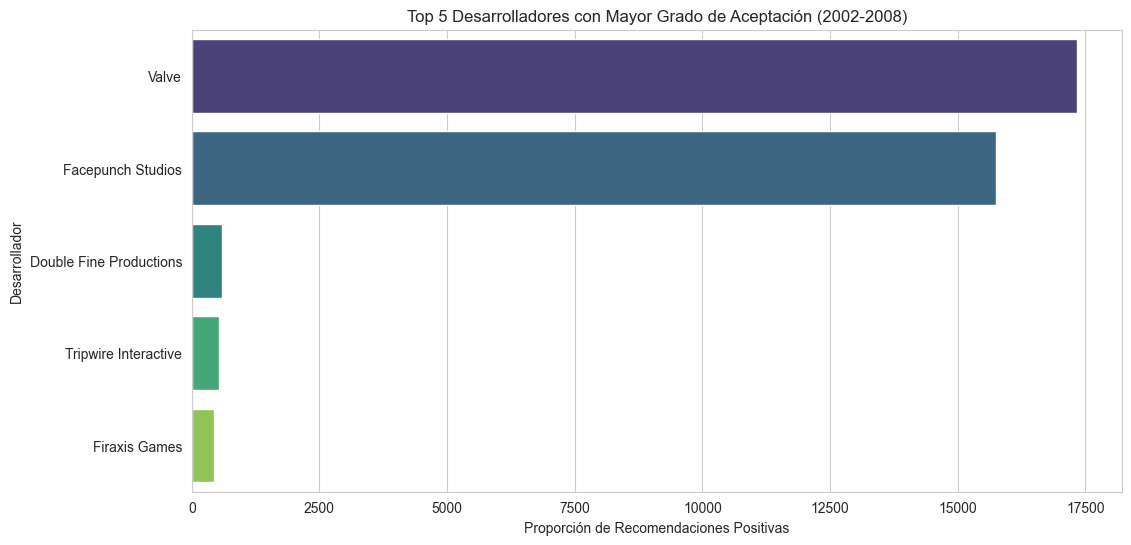

In [95]:
# Filtrar el DataFrame para incluir solo los datos entre 2002 y 2008 y con recommend=True
df_filtered = df[(df['year'] >= 2002) & (df['year'] <= 2010) & (df['recommend'] == True)]

# Calcular la proporción de recomendaciones positivas para cada desarrollador
developer_recommendation = df_filtered.groupby('developer')['recommend'].count().reset_index()

# Ordenar los desarrolladores según la proporción de recomendaciones positivas y seleccionar los 5 primeros
top_developers = developer_recommendation.sort_values(by='recommend', ascending=False).head(5)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='recommend', y='developer', data=top_developers, palette='viridis')
plt.xlabel('Proporción de Recomendaciones Positivas')
plt.ylabel('Desarrollador')
plt.title('Top 5 Desarrolladores con Mayor Grado de Aceptación (2002-2008)')
plt.show()

                Usuarios con Mayor Grado de Satisfacción                

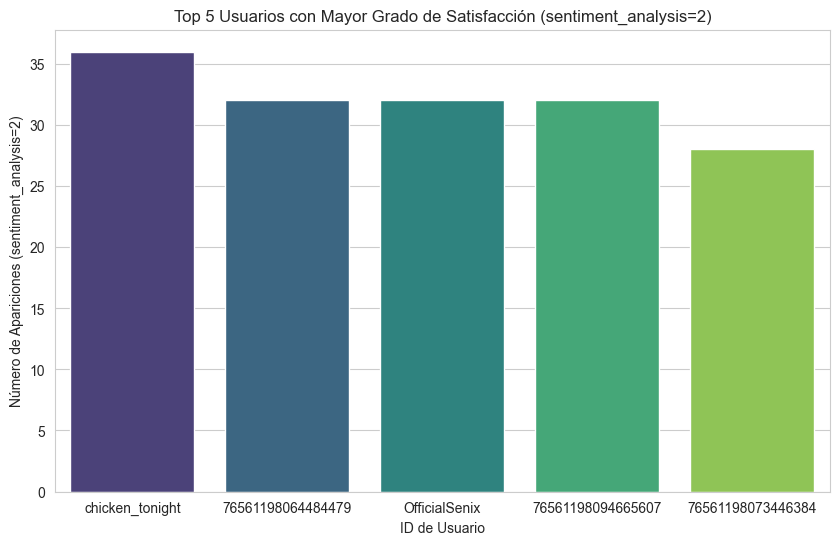

In [93]:
# Filtrar el DataFrame para obtener solo las filas donde sentiment_analysis es igual a 2
satisfied_users = df[df['sentiment_analysis'] == 2]

# Contar el número de veces que aparece cada usuario con sentiment_analysis=2
satisfied_users_count = satisfied_users.groupby('user_id').size().reset_index(name='count')

# Ordenar los usuarios por el número de apariciones en orden descendente
top_users = satisfied_users_count.sort_values(by='count', ascending=False).head(5)

# Crear la visualización con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='user_id', y='count', data=top_users, palette='viridis')
plt.xlabel('ID de Usuario')
plt.ylabel('Número de Apariciones (sentiment_analysis=2)')
plt.title('Top 5 Usuarios con Mayor Grado de Satisfacción (sentiment_analysis=2)')
plt.show()

                    Los Juegos Más Recomendados                 

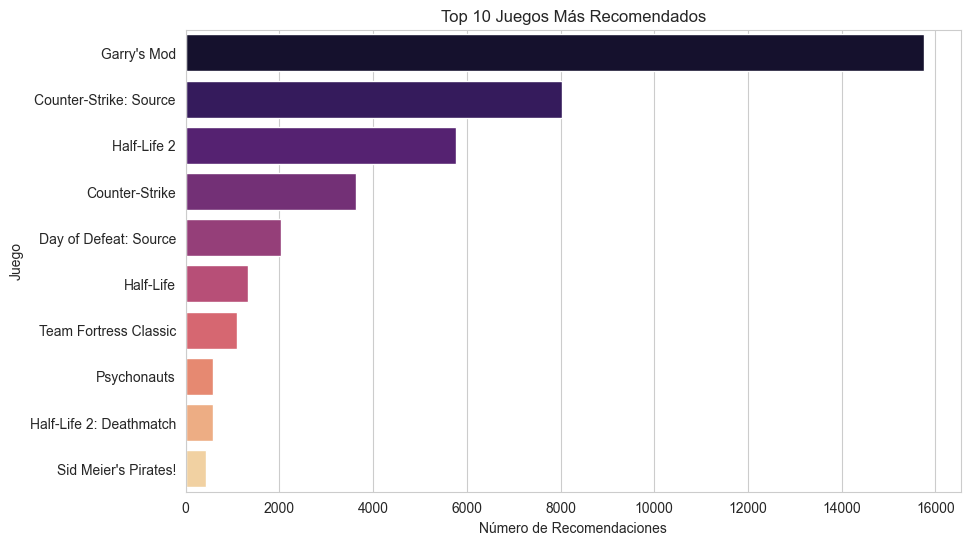

In [96]:
# Filtrar el DataFrame para obtener solo las filas recomendadas
df_recommended = df[df['recommend'] == True]

# Contar el número de recomendaciones para cada juego
top_games = df_recommended['title'].value_counts().head(10)

# Crear un gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=top_games.values, y=top_games.index, palette='magma')
plt.xlabel('Número de Recomendaciones')
plt.ylabel('Juego')
plt.title('Top 10 Juegos Más Recomendados')
plt.show()